In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('oasis_longitudinal.csv')
data.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [3]:
c = pd.read_csv("oasis_cross-sectional.csv")
c.head(10)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
5,OAS1_0006_MR1,F,R,24,NaN,NaN,NaN,NaN,1131,0.862,1.551,NaN
6,OAS1_0007_MR1,M,R,21,NaN,NaN,NaN,NaN,1516,0.830,1.157,NaN
7,OAS1_0009_MR1,F,R,20,NaN,NaN,NaN,NaN,1505,0.843,1.166,NaN
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,NaN
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,NaN


In [4]:
data=pd.read_csv('oasis_longitudinal.csv')
data.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [5]:
c = pd.read_csv("oasis_cross-sectional.csv")
c.head(10)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
5,OAS1_0006_MR1,F,R,24,NaN,NaN,NaN,NaN,1131,0.862,1.551,NaN
6,OAS1_0007_MR1,M,R,21,NaN,NaN,NaN,NaN,1516,0.830,1.157,NaN
7,OAS1_0009_MR1,F,R,20,NaN,NaN,NaN,NaN,1505,0.843,1.166,NaN
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,NaN
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,NaN


In [6]:
c.dtypes

ID        object
M/F       object
Hand      object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Delay    float64
dtype: object

In [7]:
data.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [8]:
c.isnull().sum()

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

In [9]:
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [10]:
c.shape

(436, 12)

In [11]:
data.shape

(373, 15)

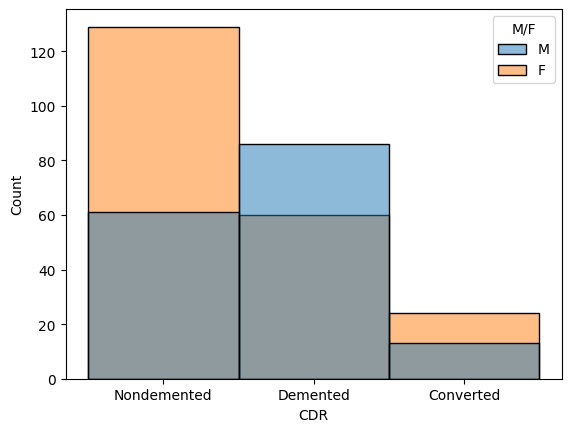

In [12]:
sns.histplot(x='Group',data=data,hue='M/F')
plt.xlabel("CDR")
plt.savefig('genderldfcdr.png', dpi=300)

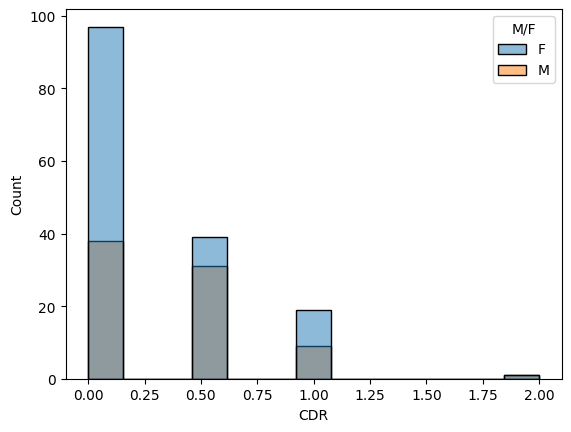

In [13]:
sns.histplot(x='CDR', data=c, hue='M/F')
plt.xlabel("CDR")
plt.savefig('genderldfcdr.png', dpi=300)


In [14]:
data = data.loc[data['Visit']==1]          #Only look at first visit
data = data.reset_index(drop=True)         #reset index after filtering first visit data

In [15]:
data = data[['Group', 'M/F', 'Age', 'EDUC', 'SES',
            'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]
data.rename(columns={'M/F':'Gender'}, inplace=True)
data.head()

,Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,Nondemented,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,Nondemented,M,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,Demented,M,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [16]:
# Select relevant columns in DataFrame c
c = c[['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]

# Rename the 'M/F' column to 'Gender'
c.rename(columns={'M/F': 'Gender'}, inplace=True)

# Display the first few rows of the DataFrame
c.head()


,Gender,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,M,18,NaN,NaN,NaN,NaN,1737,0.848,1.010


In [17]:
#Check for missing values
data.isna().sum()



Group     0
Gender    0
Age       0
EDUC      0
SES       8
MMSE      0
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [18]:
#Check for missing values
c.isna().sum()



Gender      0
Age         0
Educ      201
SES       220
MMSE      201
CDR       201
eTIV        0
nWBV        0
ASF         0
dtype: int64

In [19]:
data['SES'].value_counts()

SES
2.0    42
3.0    34
1.0    33
4.0    30
5.0     3
Name: count, dtype: int64

In [20]:
c['SES'].value_counts()

SES
2.0    65
1.0    50
3.0    49
4.0    49
5.0     3
Name: count, dtype: int64

In [21]:
data['SES'] = data['SES'].fillna(2.0)

In [22]:
# Check for missing values in all columns
missing_values = c.isna().sum()
print(missing_values)

# Fill missing values in numerical columns with median
numerical_cols = ['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
for col in numerical_cols:
    median_val = c[col].median()
    c[col] = c[col].fillna(median_val)

# Fill missing values in categorical columns with mode (if any)
categorical_cols = ['Gender']
for col in categorical_cols:
    mode_val = c[col].mode()[0]
    c[col] = c[col].fillna(mode_val)

# Check if there are still any missing values
print(c.isna().sum().sum())




Gender      0
Age         0
Educ      201
SES       220
MMSE      201
CDR       201
eTIV        0
nWBV        0
ASF         0
dtype: int64
0


In [23]:
data.isna().sum().sum()

0

In [24]:
c.isna().sum().sum()

0

In [25]:
#Binary encode object columns
data['Group'] = data['Group'].apply(lambda x: 1 if x == 'Demented' else 0)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

In [26]:
selected_features = ['Gender', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'CDR']
X = data[selected_features]
y = data['CDR']  

In [27]:
# Encode categorical feature 'M/F' using LabelEncoder
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])


In [28]:
data.head(10)

,Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
2,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,1,1,71,16,2.0,28.0,0.5,1357,0.748,1.293
5,0,0,93,14,2.0,30.0,0.0,1272,0.698,1.380
6,1,1,68,12,2.0,27.0,0.5,1457,0.806,1.205
7,1,0,66,12,3.0,30.0,0.5,1447,0.769,1.213
8,0,0,78,16,2.0,29.0,0.0,1333,0.748,1.316
9,0,0,81,12,4.0,30.0,0.0,1230,0.715,1.427


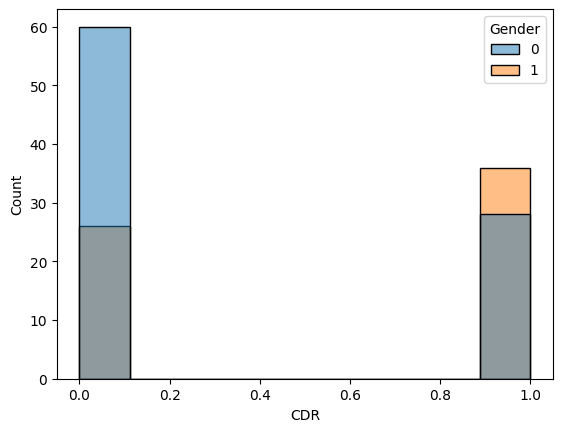

In [29]:
sns.histplot(x='Group',data=data,hue='Gender')
plt.xlabel("CDR")
plt.savefig('genderldfcdr.png', dpi=300)

<Axes: xlabel='Age', ylabel='Count'>

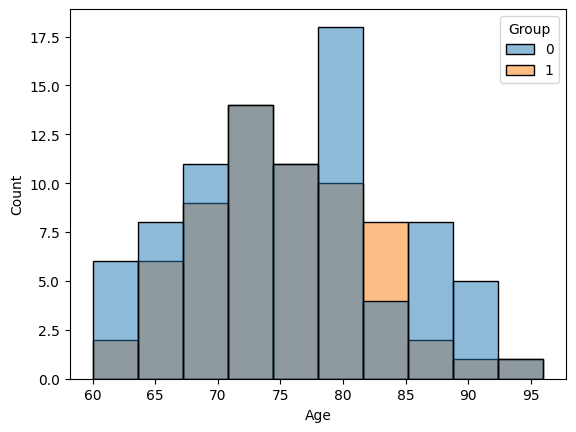

In [30]:
sns.histplot(x='Age',data=data,hue='Group')

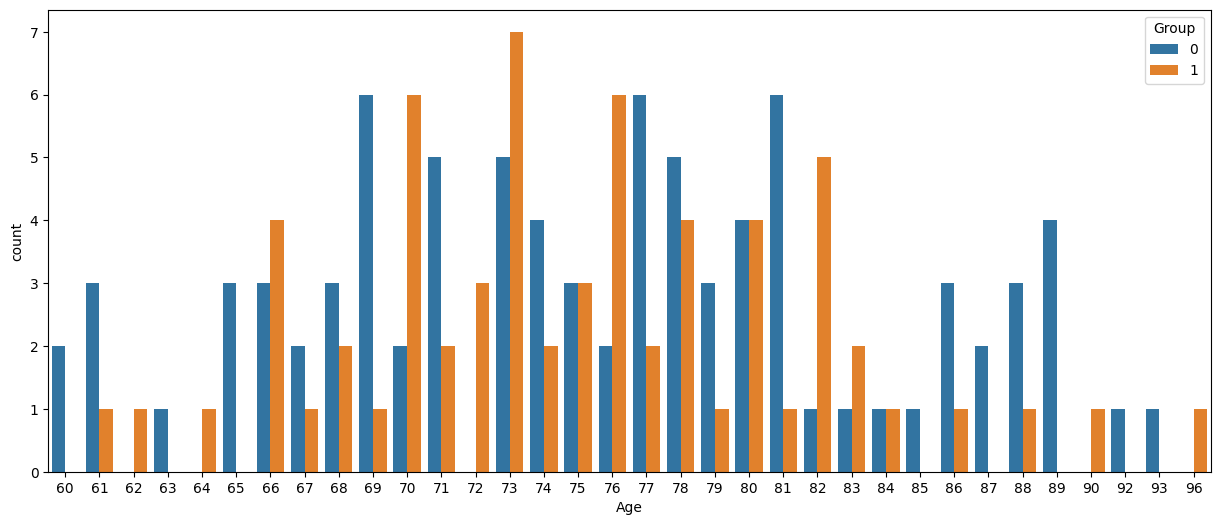

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(x ='Age',hue='Group',data =data)
plt.savefig('longitudinal_by_age.png', dpi=300)

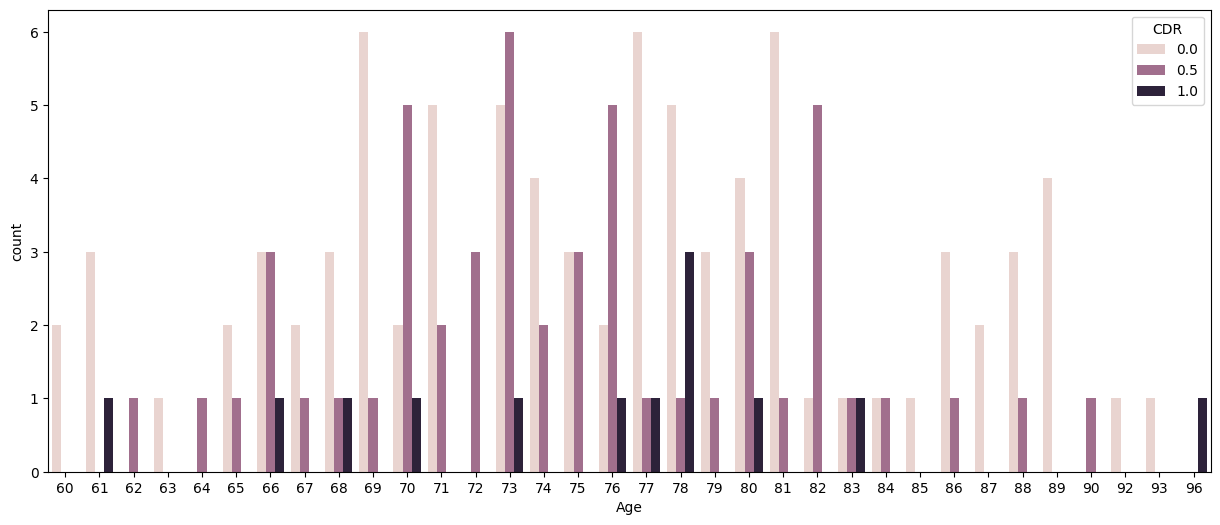

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(x ='Age',hue='CDR',data = data)
plt.savefig('CDR_18-96.png', dpi=300)

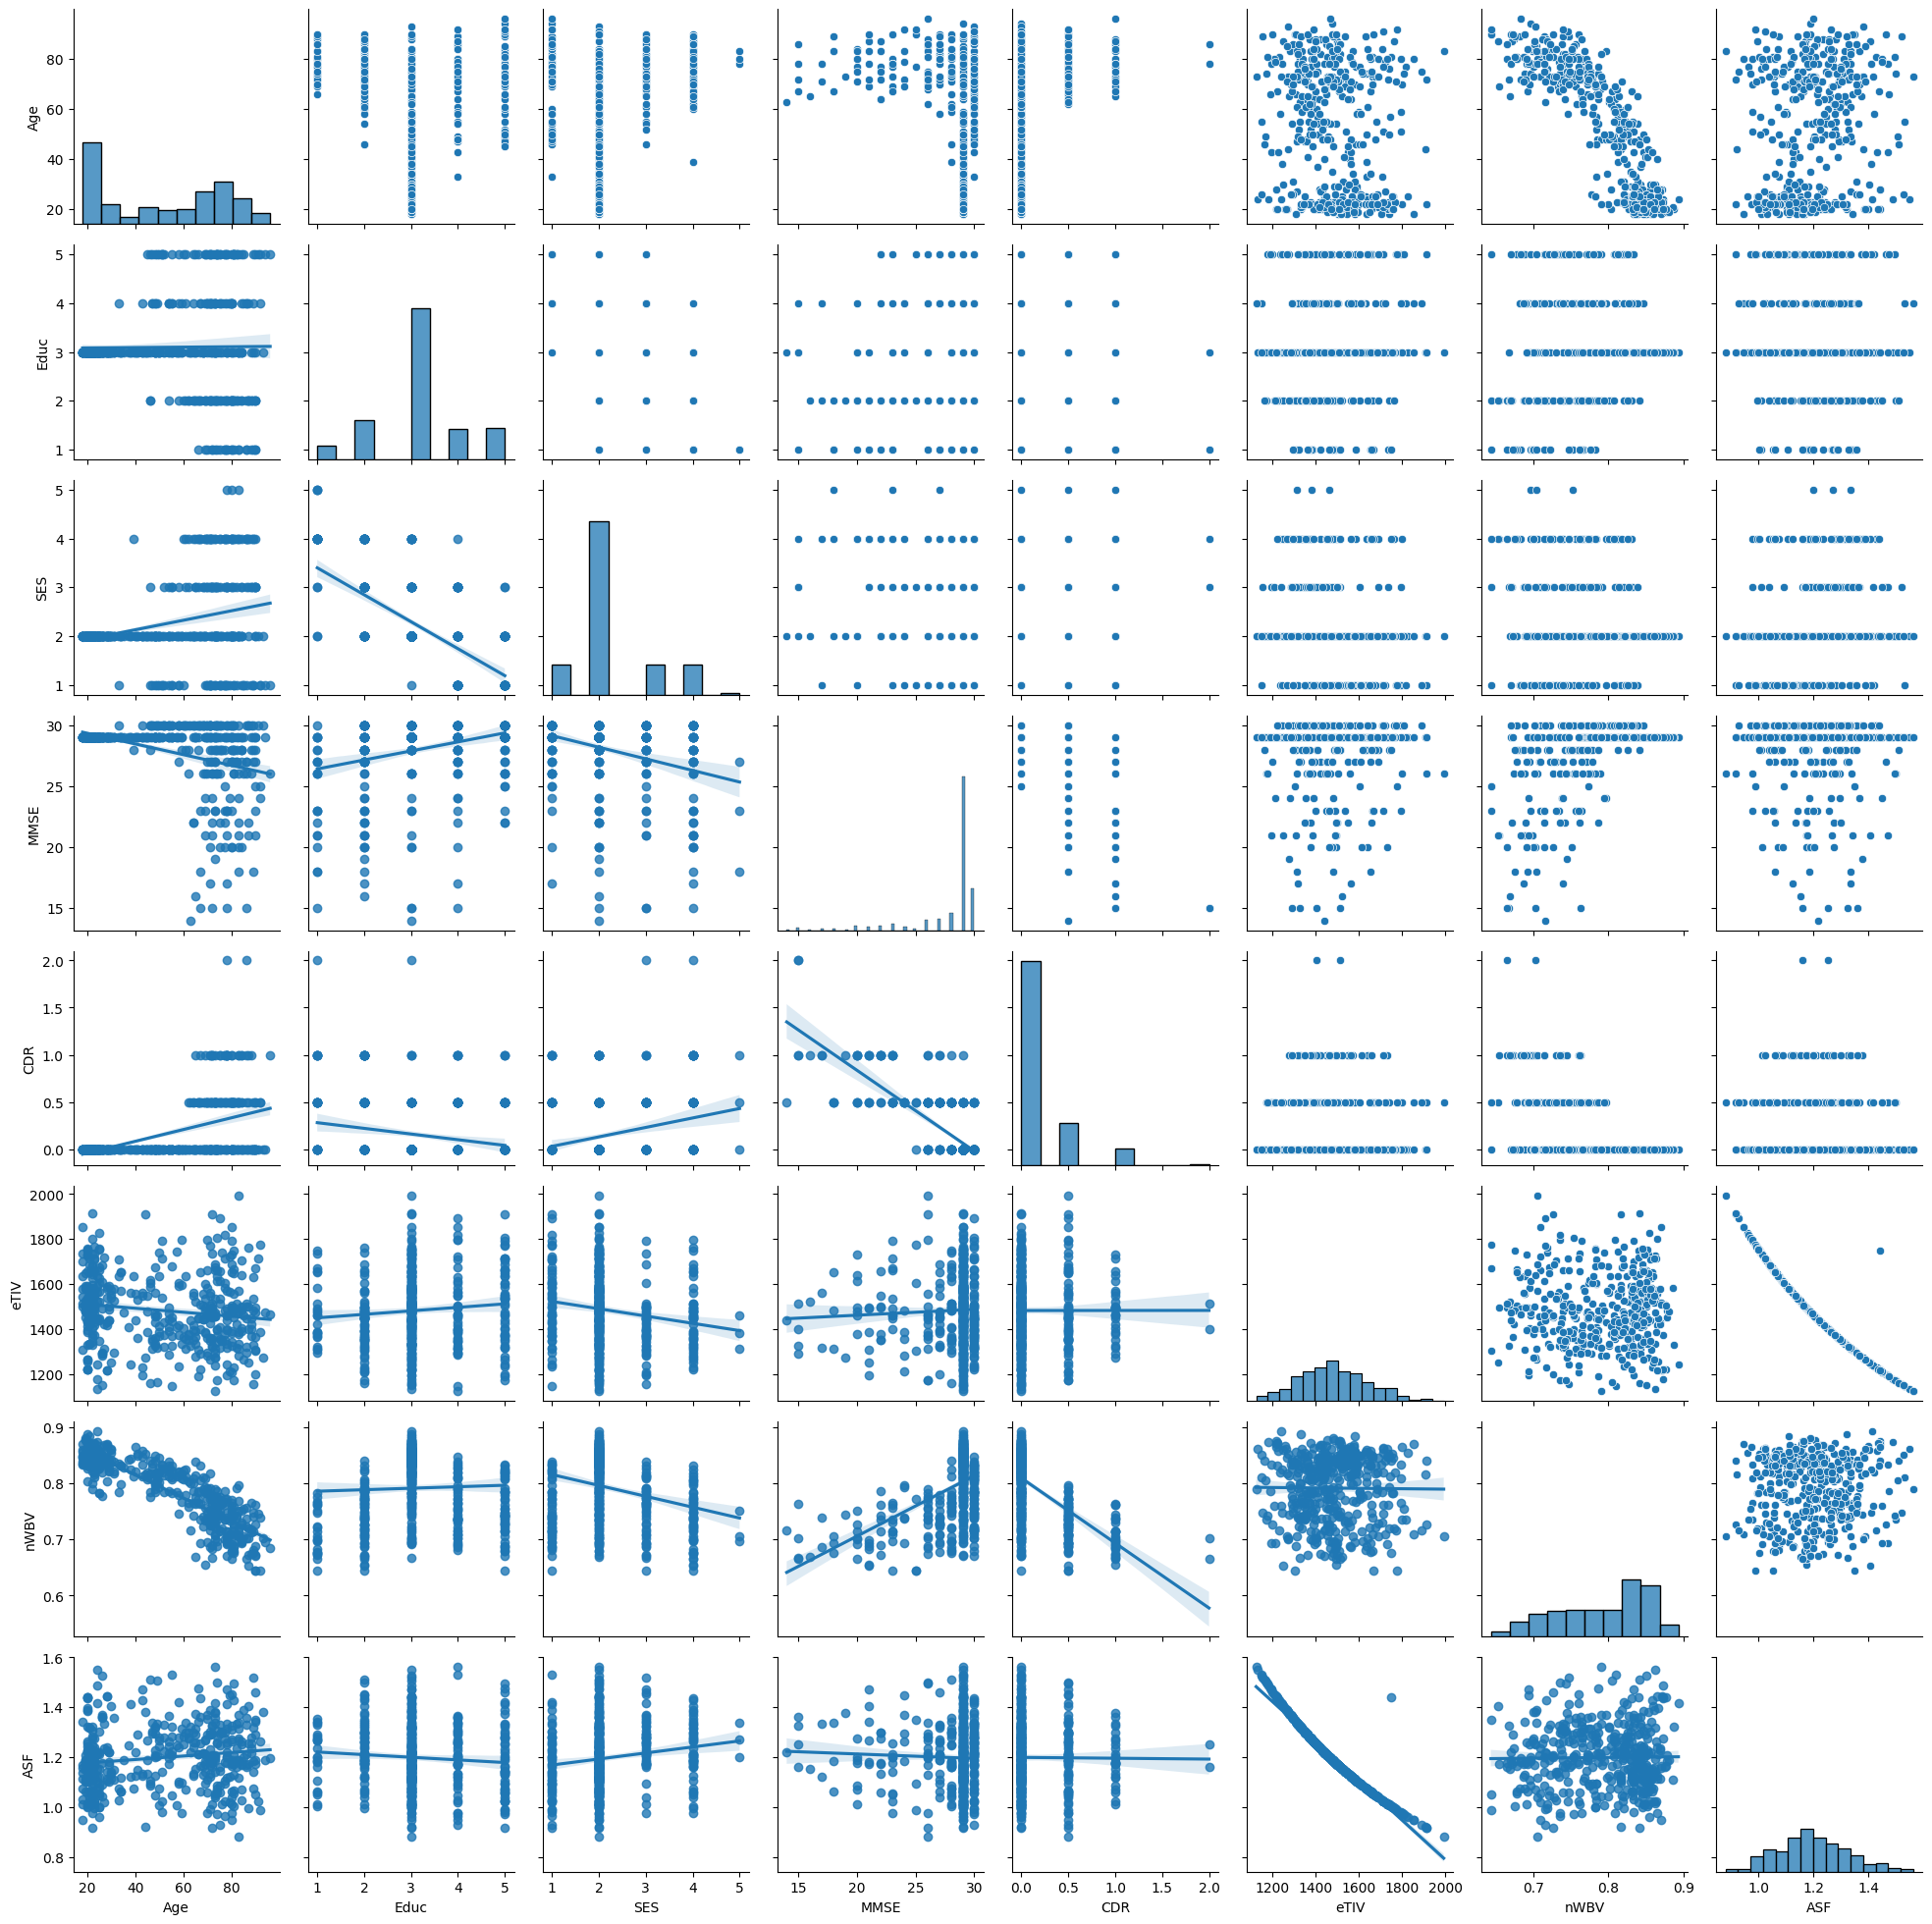

In [33]:
g=sns.PairGrid(c)
g.map_lower(sns.regplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
plt.savefig("pairplot.png", dpi=300)
plt.show()

In [34]:
data = data.astype('float64')
print(data.dtypes)

Group     float64
Gender    float64
Age       float64
EDUC      float64
SES       float64
MMSE      float64
CDR       float64
eTIV      float64
nWBV      float64
ASF       float64
dtype: object


In [35]:
data.describe()

,Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000
mean,0.426667,0.413333,75.446667,14.533333,2.466667,27.56000,0.260000,1474.426667,0.736073,1.206333
std,0.496250,0.494081,7.545421,2.874714,1.103178,2.96847,0.326256,174.683889,0.036458,0.137864
min,0.000000,0.000000,60.000000,6.000000,1.000000,17.00000,0.000000,1123.000000,0.660000,0.883000
25%,0.000000,0.000000,70.000000,12.000000,2.000000,26.00000,0.000000,1347.250000,0.710000,1.121000
50%,0.000000,0.000000,75.000000,14.000000,2.000000,29.00000,0.000000,1453.500000,0.735000,1.207500
75%,1.000000,1.000000,80.000000,16.000000,3.000000,30.00000,0.500000,1565.250000,0.757750,1.302750
max,1.000000,1.000000,96.000000,23.000000,5.000000,30.00000,1.000000,1987.000000,0.837000,1.563000


In [36]:
def preprocessing_inputs(df):
    df = df.copy()
    
    #split df into X and y
    y = df['Group']
    X = df.drop(['Group', 'ASF'], axis=1)
    
    #Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    #Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [37]:
X_train, X_test, y_train, y_test = preprocessing_inputs(data)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (105, 8) (105,)
Test set: (45, 8) (45,)


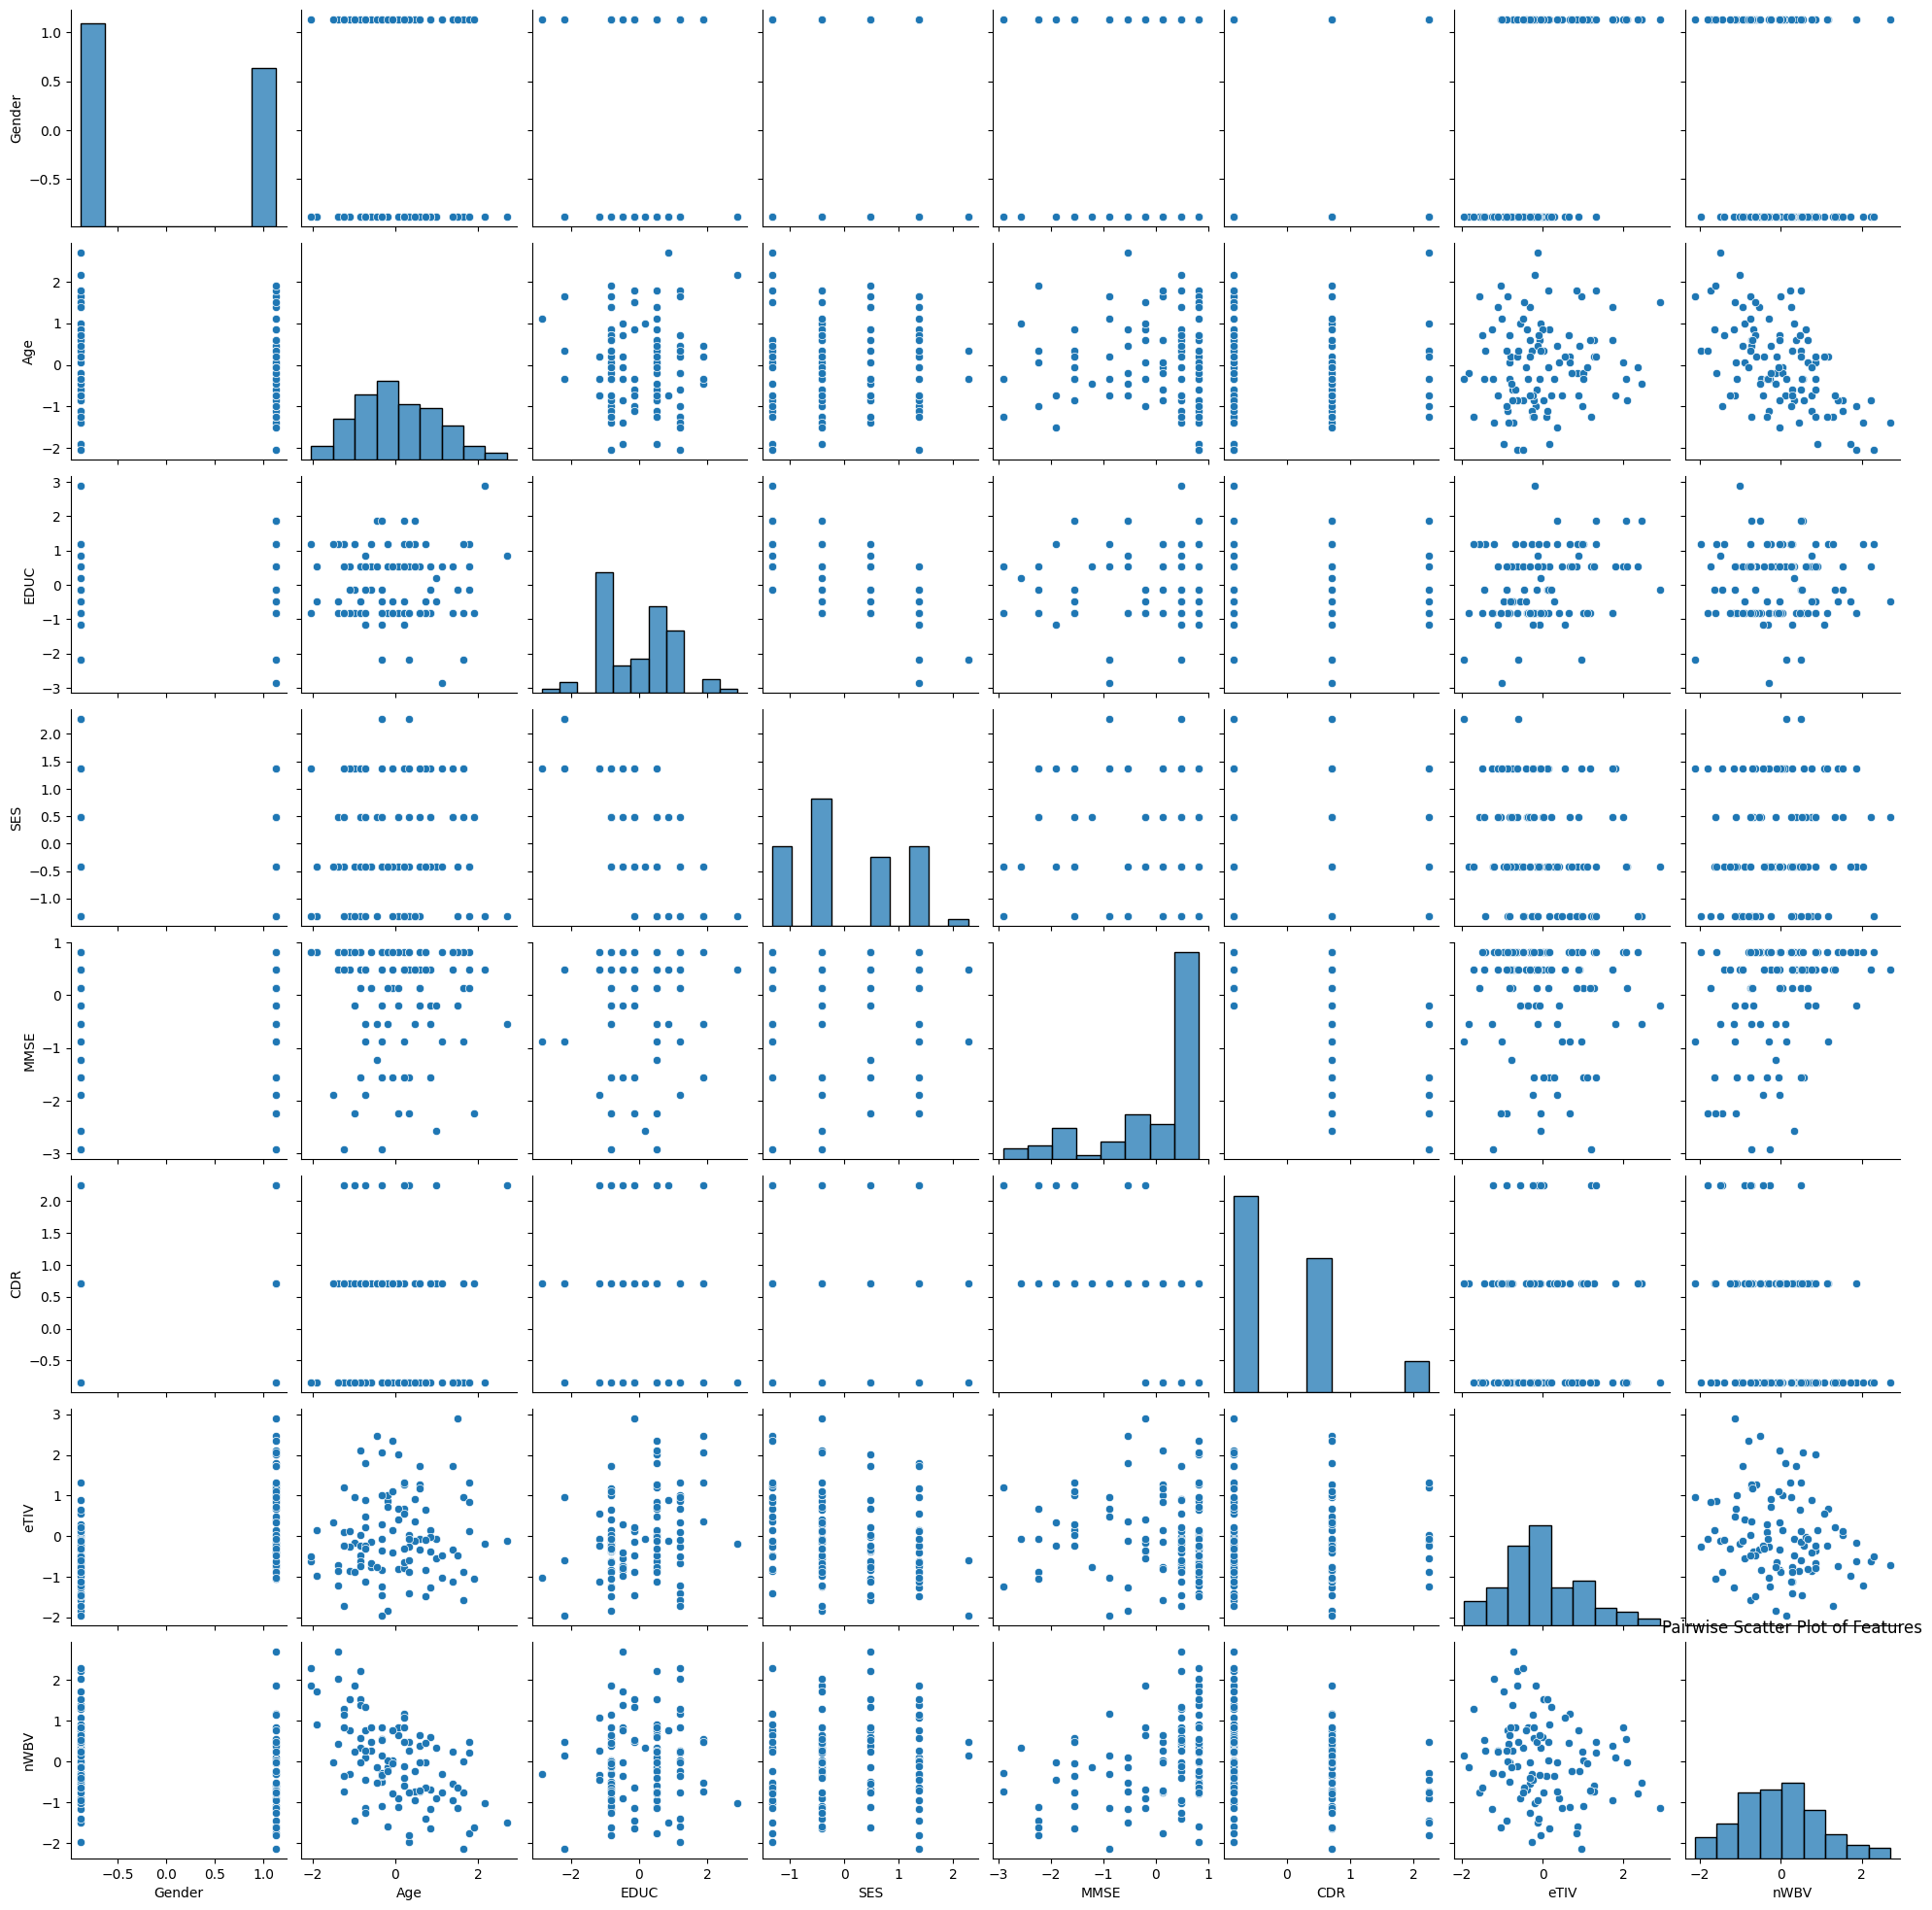

In [38]:
# Create scatter plots for pairs of features in X_train
sns.pairplot(X_train)
plt.title('Pairwise Scatter Plot of Features')
plt.show()


In [39]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Step 3: Feature Selection
# Scale the input data to ensure non-negative values
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Select top 5 features based on chi-square score
selector = SelectKBest(score_func=chi2, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test)

# Print the selected features
selected_features_indices = selector.get_support(indices=True)
selected_features_names = X.columns[selected_features_indices]
print("Selected Features:", selected_features_names)


Selected Features: Index(['Gender', 'EDUC', 'MMSE', 'eTIV', 'ASF'], dtype='object')


In [40]:
data.head(10)

,Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0.0,1.0,87.0,14.0,2.0,27.0,0.0,1987.0,0.696,0.883
1,1.0,1.0,75.0,12.0,2.0,23.0,0.5,1678.0,0.736,1.046
2,0.0,0.0,88.0,18.0,3.0,28.0,0.0,1215.0,0.710,1.444
3,0.0,1.0,80.0,12.0,4.0,28.0,0.0,1689.0,0.712,1.039
4,1.0,1.0,71.0,16.0,2.0,28.0,0.5,1357.0,0.748,1.293
5,0.0,0.0,93.0,14.0,2.0,30.0,0.0,1272.0,0.698,1.380
6,1.0,1.0,68.0,12.0,2.0,27.0,0.5,1457.0,0.806,1.205
7,1.0,0.0,66.0,12.0,3.0,30.0,0.5,1447.0,0.769,1.213
8,0.0,0.0,78.0,16.0,2.0,29.0,0.0,1333.0,0.748,1.316
9,0.0,0.0,81.0,12.0,4.0,30.0,0.0,1230.0,0.715,1.427


In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [42]:
log_reg.score(X_test, y_test)

1.0

In [43]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(max_depth=12)
dTree.fit(X_train, y_train)
prediction = dTree.predict(X_test)
print (dTree.score(X_train, y_train))
print (dTree.score(X_test, y_test))

1.0
1.0


In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
prediction = knn.predict(X_test)
print(knn.score(X_test, y_test))

0.9714285714285714
0.9777777777777777


In [45]:
from sklearn.svm import SVC
svc=SVC(kernel="linear", C=0.01)
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)
print (svc.score(X_train, y_train))
print (svc.score(X_test, y_test))

0.9428571428571428
1.0


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
data = pd.read_csv('oasis_longitudinal.csv')

# Filter the data for the first visit
data = data.loc[data['Visit'] == 1].reset_index(drop=True)

# Select relevant features and target
data = data[['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]
data.rename(columns={'M/F': 'Gender'}, inplace=True)

# Handle missing values
data['SES'] = data['SES'].fillna(2.0)

# Binary encode object columns
data['Group'] = data['Group'].apply(lambda x: 1 if x == 'Demented' else 0)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

# Split the data into features and target variable
X = data.drop('Group', axis=1)
y = data['Group']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10]},
    'Decision Tree': {'max_depth': [5, 10, 15, 20]},
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'SVM': {'C': [0.001, 0.01, 0.1, 1, 10]}
}

# Perform GridSearchCV for each model
best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_

# Evaluate the best models
results = {}
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Confusion Matrix': conf_matrix}

# Print the results
for name, result in results.items():
    print(f"{name}:\nAccuracy: {result['Accuracy']}\nConfusion Matrix:\n{result['Confusion Matrix']}")


Logistic Regression:
Accuracy: 1.0
Confusion Matrix:
[[28  0]
 [ 0 17]]
Decision Tree:
Accuracy: 1.0
Confusion Matrix:
[[28  0]
 [ 0 17]]
KNN:
Accuracy: 1.0
Confusion Matrix:
[[28  0]
 [ 0 17]]
SVM:
Accuracy: 1.0
Confusion Matrix:
[[28  0]
 [ 0 17]]


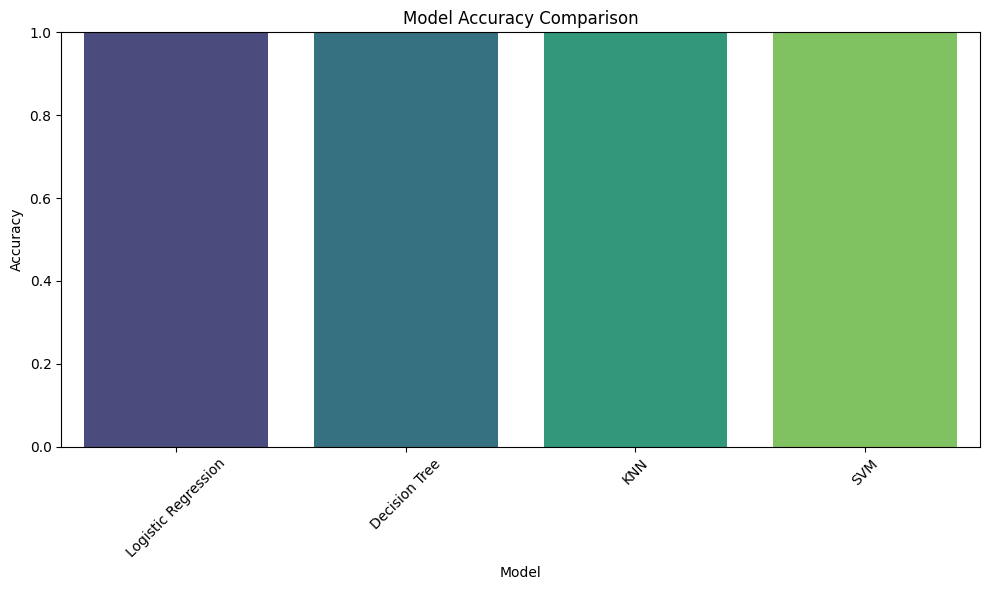

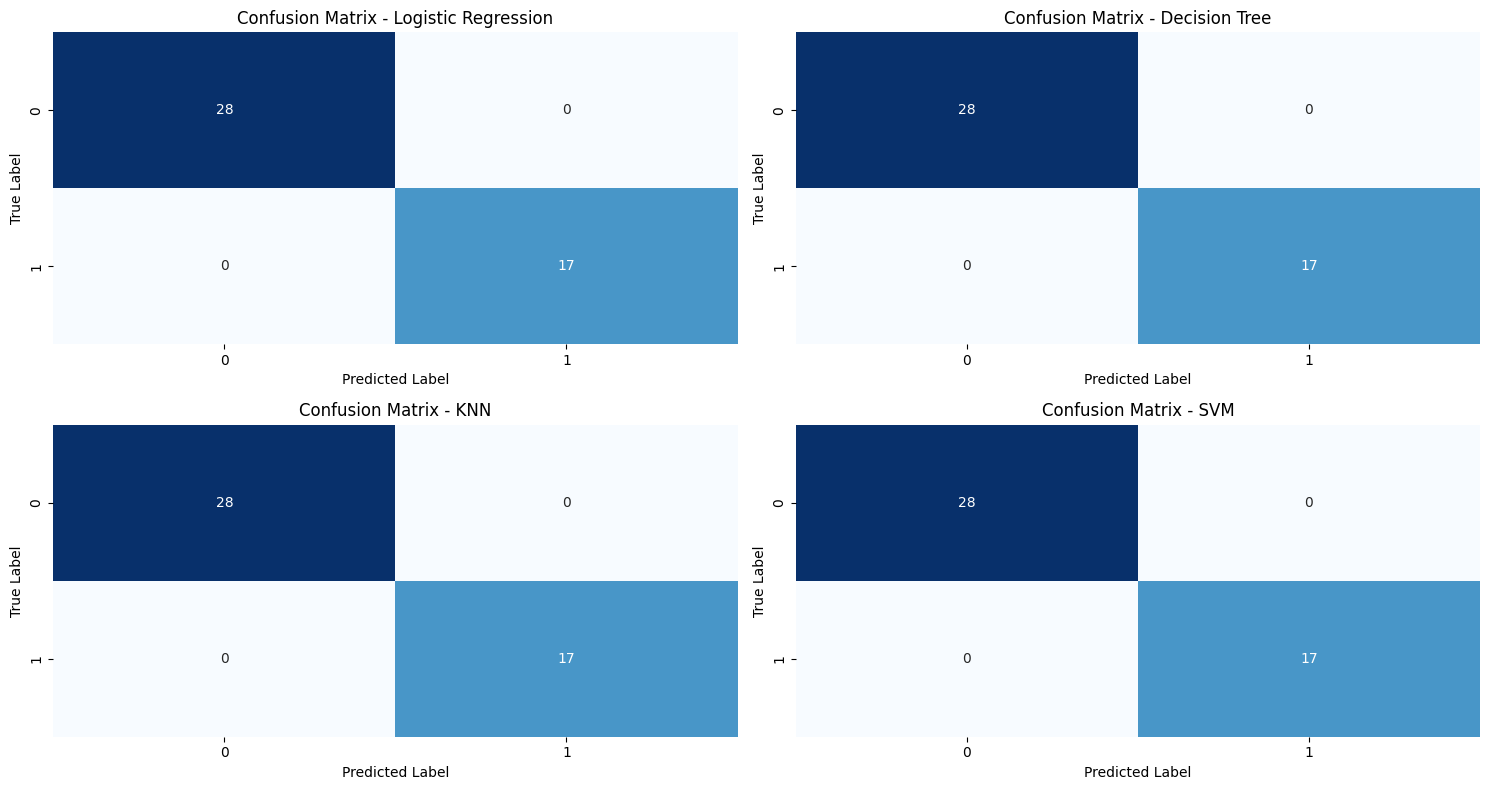

In [47]:
# Extract the accuracy scores and confusion matrices
model_names = list(results.keys())
accuracies = [result['Accuracy'] for result in results.values()]
conf_matrices = [result['Confusion Matrix'] for result in results.values()]

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the confusion matrices
plt.figure(figsize=(15, 8))
for i, (name, conf_matrix) in enumerate(zip(model_names, conf_matrices), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [48]:
# Select relevant columns in DataFrame c
c = c[['Gender', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]

# Rename the 'M/F' column to 'Gender' for c
c.rename(columns={'M/F': 'Gender'}, inplace=True)

# Handle missing values in 'SES' for c
median_ses = c['SES'].median()
c['SES'] = c['SES'].fillna(median_ses)

# Check for missing values in c
c.isna().sum()

# Binary encode object columns for c
label_encoder_c = LabelEncoder()
c['Gender'] = label_encoder_c.fit_transform(c['Gender'])

In [49]:
# Define X and y for c
X_c = c.drop('CDR', axis=1)
y_c = c['CDR']

# Scale X_c for c
scaler_c = StandardScaler()
X_c_scaled = scaler_c.fit_transform(X_c)

# Split the data into training and testing sets for data
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_c, y_c, test_size=0.3, random_state=1)

# Split the data into training and testing sets for c
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c_scaled, y_c, test_size=0.3, random_state=1)


In [50]:
from sklearn.linear_model import LogisticRegression
log_reg_c = LogisticRegression()
log_reg_c.fit(X_train, y_train)


LogisticRegression()

In [51]:
log_reg_c.score(X_test, y_test)

1.0

In [53]:
# Check the columns of X_c
print("Columns in X_c:", X_c.columns)

# Check the coefficients of the logistic regression model log_reg_c
coefficients = log_reg_c.coef_[0]
feature_names = X_c.columns
coefficients_dict = dict(zip(feature_names, coefficients))
print("Coefficients of the logistic regression model:")
print(coefficients_dict)


Columns in X_c: Index(['Gender', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'], dtype='object')
Coefficients of the logistic regression model:
{'Gender': 0.39635198411078765, 'Age': -0.06281960714714123, 'Educ': -0.17011428651870159, 'SES': 0.014440631928842283, 'MMSE': -1.0678859762311188, 'eTIV': 3.1464409303516256, 'nWBV': -0.07943940907509324, 'ASF': -0.13995384587514761}


In [54]:
predictions_data = log_reg.predict(X_test)
predictions_c = log_reg_c.predict(X_test_c)

# Average the predictions
final_predictions = (predictions_data + predictions_c) / 2

ValueError: X has 9 features, but LogisticRegression is expecting 8 features as input.